In [39]:
#Importing Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip list

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.

In [3]:
#Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
#Check if our dataset contains any null values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### EDA 

Analyse univariee

In [9]:
dataset["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
dataset["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:>

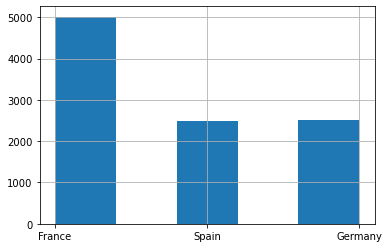

In [11]:
dataset["Geography"].hist(bins=5)

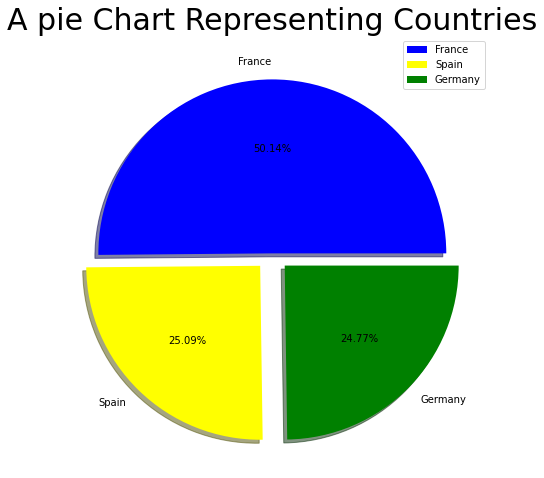

In [12]:
#plotting a pie chart 

colors=["blue","yellow","green"]
explode=[0,0.1,0.1]

plt.rcParams['figure.figsize']=(8,8)
plt.pie(dataset["Geography"].value_counts(),labels=dataset["Geography"].unique(),colors=colors,explode=explode,shadow=True,autopct="%.2f%%")
plt.title("A pie Chart Representing Countries",fontsize=30)
plt.legend()
plt.axis("off")
plt.show()

In [13]:
#Representation graphique du genre 

In [14]:
dataset["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
dataset["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:>

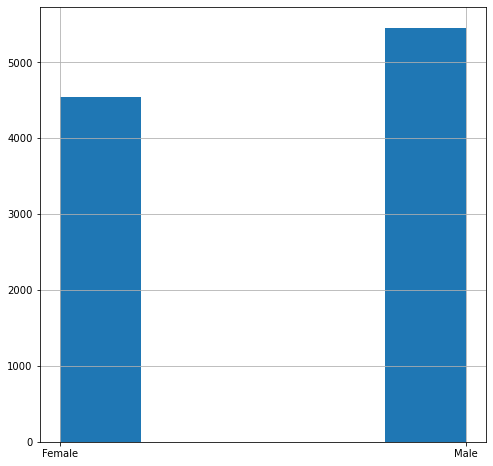

In [16]:
dataset["Gender"].hist(bins=5)

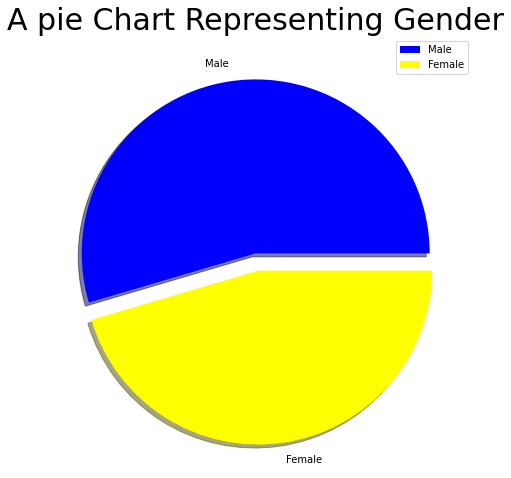

In [17]:
#plotting a pie chart 

size= [5457,4543]
labels= "Male", "Female"
colors=["blue","yellow"]
explode=[0,0.1]

plt.rcParams['figure.figsize']=(8,8)
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True)
plt.title("A pie Chart Representing Gender",fontsize=30)
plt.legend()
plt.axis("off")
plt.show()

<AxesSubplot:>

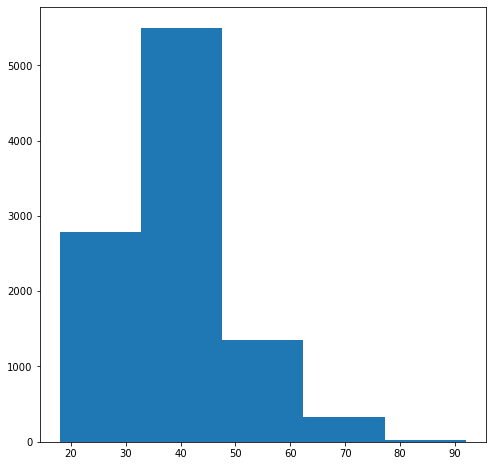

In [18]:
dataset.Age.hist(bins=5,grid=False,)

<AxesSubplot:>

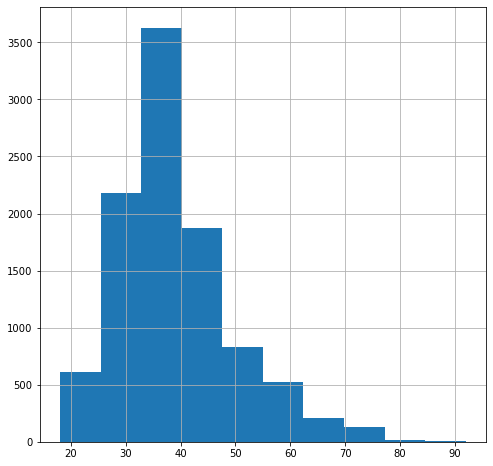

In [19]:
dataset["Age"].loc[(dataset["Age"]>35) & dataset["Age"]<45].hist()

### Analyse Bivariee

In [20]:
# calculating total balance in france, germany and spain

total_france = dataset.Balance[dataset.Geography == 'France'].sum()
total_germany = dataset.Balance[dataset.Geography == 'Germany'].sum()
total_spain = dataset.Balance[dataset.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)

Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


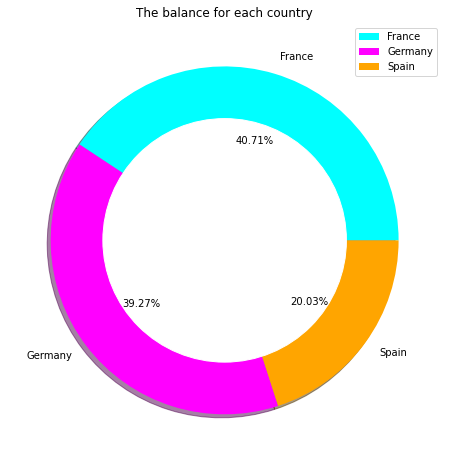

In [21]:
# plotting a donut chart for visualizing balance for each country

labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
size =  [311, 300, 153]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('The balance for each country', fontsize = 12)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

### Data Processing


In [22]:
#Removing the unecessary features from the dataset
dataset = dataset.drop(['CustomerId',"Surname","RowNumber"],axis=1)
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [23]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Train test split

In [24]:
X = dataset.iloc[:,0:10]
y=dataset.iloc[:,10]

print(X.columns)

print(X.shape)
print(y.shape)


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
(10000, 10)
(10000,)


In [25]:
#Encoding Categorical variables into numerical variables
#One hot encoding
X = pd.get_dummies(X)
X.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,1,0,0,0,1


In [26]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y, test_size =0.25,random_state=1)

print(train_X.shape)
print(train_y.shape)
print(test_y.shape)
print(test_X.shape)

(7500, 13)
(7500,)
(2500,)
(2500, 13)


### Normalize our df

In [27]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

train_X = pd.DataFrame(train_X)
train_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.719980,1.256181,0.683089,-1.228601,-0.910949,0.642621,0.983339,-1.480501,1.0008,-0.582072,-0.573245,-0.917769,0.917769
1,-0.753272,-0.659527,-1.397668,-1.228601,0.800932,0.642621,-1.016944,-1.565230,1.0008,-0.582072,-0.573245,1.089599,-1.089599
2,0.575745,0.394112,-1.397668,-1.228601,0.800932,0.642621,-1.016944,-1.182108,-0.9992,-0.582072,1.744456,1.089599,-1.089599
3,1.791436,0.585683,-0.704082,0.844319,-0.910949,-1.556128,-1.016944,-0.692551,1.0008,-0.582072,-0.573245,-0.917769,0.917769
4,-1.577469,-0.659527,1.029882,-1.228601,0.800932,0.642621,-1.016944,-0.567289,1.0008,-0.582072,-0.573245,-0.917769,0.917769


### Modeling

The Accuracy is: 79.32 %


<AxesSubplot:>

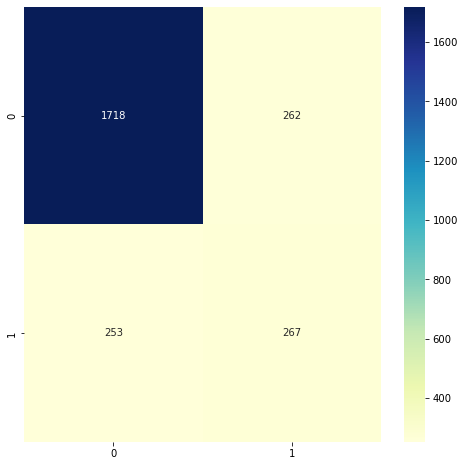

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model_dc = DecisionTreeClassifier() 
model_dc.fit(train_X, train_y)

y_pred_dc = model_dc.predict(test_X)

accuracy_dc = round(model_dc.score(test_X, test_y) * 100, 2)
print('The Accuracy is: ' +str(accurancy_dc) + ' %')

#plot matrix of confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_dc = confusion_matrix(test_y, y_pred_dc)
sns.heatmap(cm_dc, annot=True, fmt='3.0f', cmap="YlGnBu")


#grid search for optimization

Random Forest

The Accuracy is: 86.04 %


<AxesSubplot:>

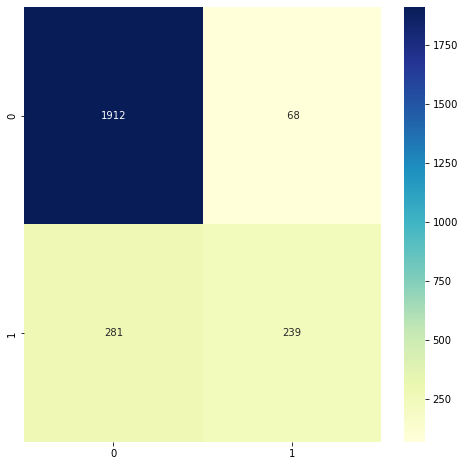

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model_rf = RandomForestClassifier() 
model_rf.fit(train_X, train_y)

y_pred_rf = model_rf.predict(test_X)

accurancy_rf = round(model_rf.score(test_X, test_y) * 100, 2)
print('The Accuracy is: ' +str(accurancy_rf) + ' %')

#plot matrix of confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(test_y, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='3.0f', cmap="YlGnBu")

In [30]:
### Validation croise

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator=model_rf , X = train_X, y =train_y , cv =5)

print(cvs)

[0.86066667 0.85533333 0.84933333 0.86       0.854     ]


In [31]:
print("Mean of cvs ", round(cvs.mean()*100 , 2))

Mean of cvs  85.59


### Logistic regression

The Accuracy is: 81.08 %


<AxesSubplot:>

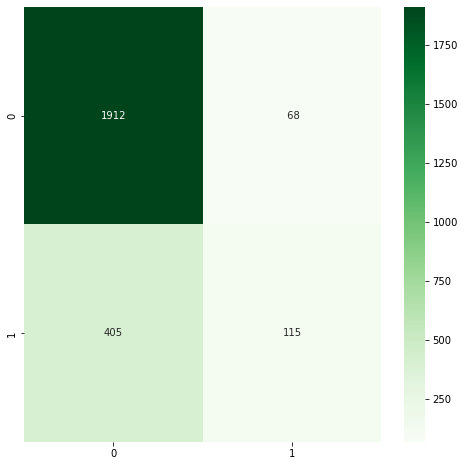

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model_lr = LogisticRegression() 
model_lr.fit(train_X, train_y)

y_pred_lr = model_lr.predict(test_X)

accurancy_lr = round(model_lr.score(test_X, test_y) * 100, 2)
print('The Accuracy is: ' +str(accurancy_lr) + ' %')

#plot matrix of confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(test_y, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='3.0f', cmap="Greens")

In [38]:
models = pd.DataFrame({
    'model':["Decision Trees", "Logistic Regression","Random forest"],
    "Score":[accuracy_dc,accurancy_lr,accurancy_rf]
    
})
models.sort_values(by='Score',ascending=False)

,model,Score
2,Random forest,86.04
1,Logistic Regression,81.08
0,Decision Trees,79.40
